In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator

from scipy import interp
import math
from scipy.stats import norm
from scipy import stats

import gc

import warnings
warnings.filterwarnings('ignore') # Disabling warnimgs for clearer outputs
pd.options.display.max_columns = 50 # Pandas option to increase max number of columns to display
plt.style.use('ggplot') # Setting default plot style

In [2]:
v_train=pd.read_csv('train.csv')
v_test = pd.read_csv('test.csv')

train_len = len(v_train)

In [3]:
display(v_train.sample(3))
display(v_test.sample(3))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
729,730,0,3,"Ilmakangas, Miss. Pieta Sofia",female,25.0,1,0,STON/O2. 3101271,7.925,NaN,S
776,777,0,3,"Tobin, Mr. Roger",male,NaN,0,0,383121,7.750,F38,Q
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.000,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
87,979,3,"Badman, Miss. Emily Louisa",female,18.0,0,0,A/4 31416,8.05,NaN,S
327,1219,1,"Rosenshine, Mr. George (Mr George Thorne"")""",male,46.0,0,0,PC 17585,79.20,NaN,C
304,1196,3,"McCarthy, Miss. Catherine Katie""""",female,NaN,0,0,383123,7.75,NaN,Q


In [4]:
# Merge visualization datasets
v_train.drop('PassengerId', axis=1, inplace=True)
v_test.drop('PassengerId', axis=1, inplace=True)

v_merged = pd.concat([v_train, v_test], sort=False).reset_index(drop=True)

In [5]:
display(v_merged.shape)
display(v_merged.columns)
display(v_merged.info)

(1309, 11)

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<bound method DataFrame.info of       Survived  Pclass                                               Name  \
0          0.0       3                            Braund, Mr. Owen Harris   
1          1.0       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2          1.0       3                             Heikkinen, Miss. Laina   
3          1.0       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4          0.0       3                           Allen, Mr. William Henry   
...        ...     ...                                                ...   
1304       NaN       3                                 Spector, Mr. Woolf   
1305       NaN       1                       Oliva y Ocana, Dona. Fermina   
1306       NaN       3                       Saether, Mr. Simon Sivertsen   
1307       NaN       3                                Ware, Mr. Frederick   
1308       NaN       3                           Peter, Master. Michael J   

         Sex   Age  SibSp  Parch           

In [6]:
for col in v_merged.columns:
    print("{} - {} Unique Values: {} ".format(col, v_merged[col].nunique(), v_merged[col].unique()))

Survived - 2 Unique Values: [ 0.  1. nan] 
Pclass - 3 Unique Values: [3 1 2] 
Name - 1307 Unique Values: ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' ... 'Saether, Mr. Simon Sivertsen'
 'Ware, Mr. Frederick' 'Peter, Master. Michael J'] 
Sex - 2 Unique Values: ['male' 'female'] 
Age - 98 Unique Values: [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.   22.5  18.5  67.   76.   26.5  60.5  11.5
  0.33  0.17 38.5 ] 
SibSp - 7 Unique Values: [1 0 3 4 2 5 8] 
Pa

### Categorical Features

In [7]:
v_merged.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

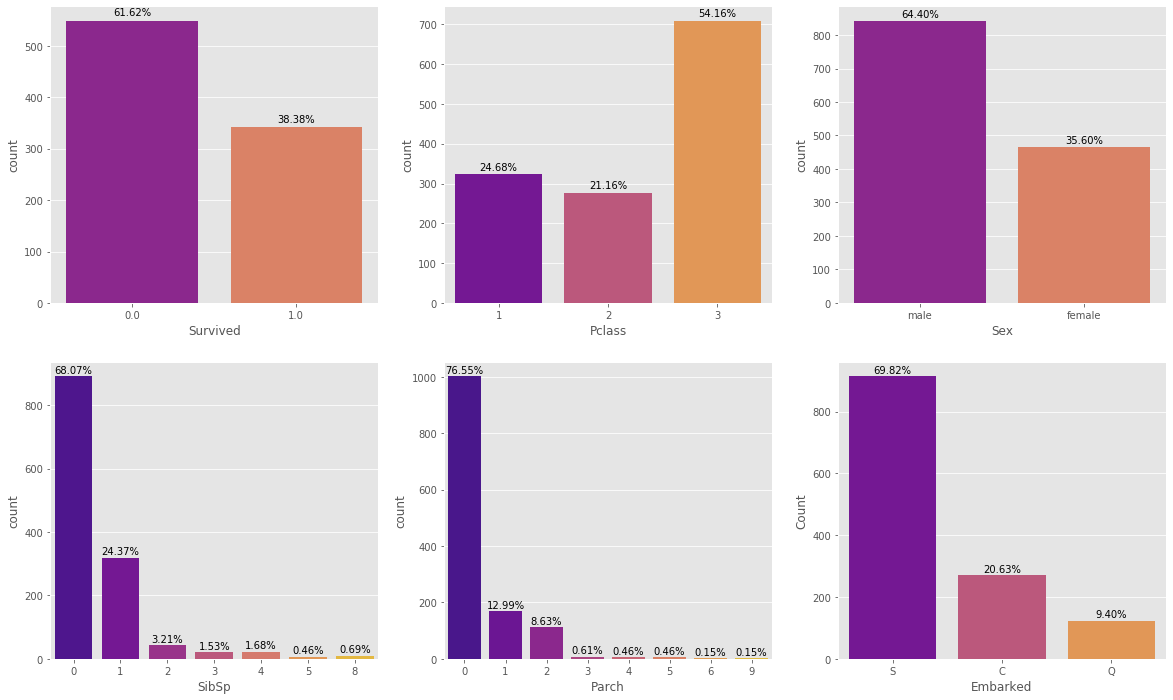

In [8]:
cats = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

def plotFrequency(cats):
    
    fig, axes = plt.subplots(math.ceil(len(cats) / 3), 3, figsize=(20, 12))
    axes = axes.flatten()
    
    for ax, cat in zip(axes, cats):
        
        if cat == 'Survived':
            total = float(len(v_train[cat]))
        else:
            total = float(len(v_merged[cat]))
            
        sns.countplot(v_merged[cat], palette='plasma', ax=ax)
        
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width() / 2.,
                    height + 10,
                    '{:1.2f}%'.format((height / total) * 100),
                    ha='center')
        
        plt.ylabel('Count')

plotFrequency(cats)

In [9]:
def plotsurvival(cats, data):
    
    fig, axes = plt.subplots(math.ceil(len(cats) / 3), 3, figsize = (20, 12))
    axes = axes.flatten()
    
    for ax, cat in zip(axes, cats):
        
        if cat == 'Survived':
            sns.countplot(data[cat], palette ='plasma', ax = ax)
            
        else:
            
            sns.countplot(x=cat,
                          data = data,
                          hue = 'Survived',
                          palette = 'plasma',
                          ax = ax)
            
            ax.legend(title='Survived?', 
                     loc = 'upper right',
                     labels = ['No', 'Yes'])
            
        plt.ylabel('Count')

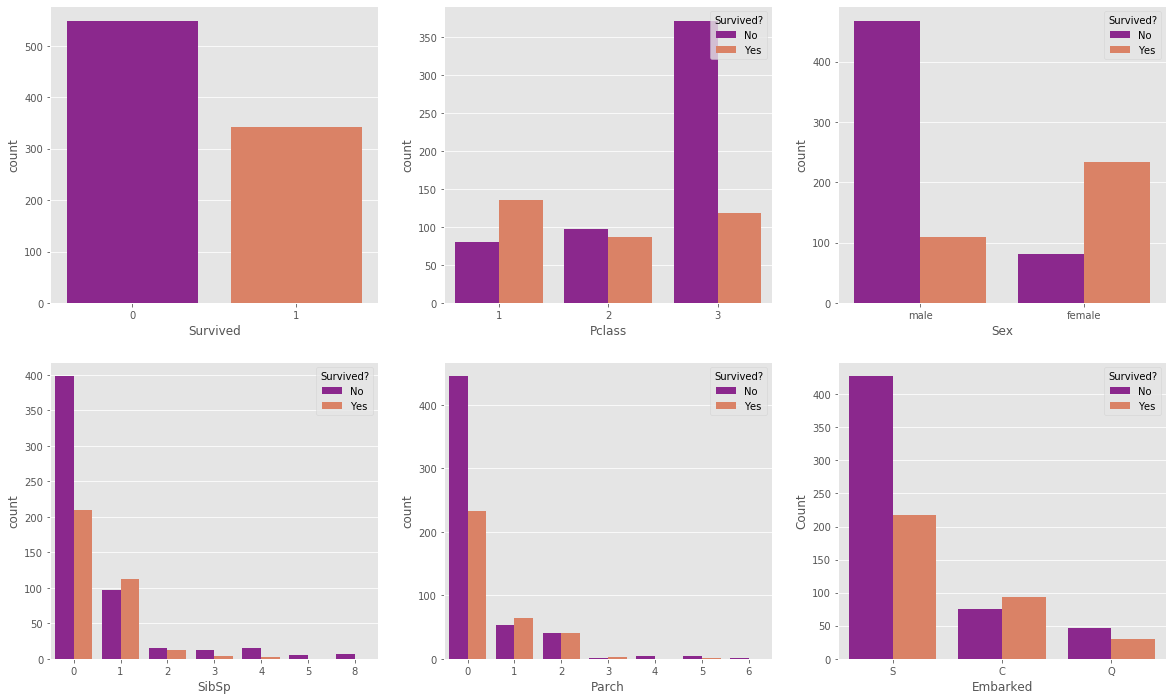

In [10]:
plotsurvival(cats, v_train)

### Numercial Features

In [11]:
def plot_3chart(df, feature):
    import matplotlib.gridspec as gridspec
    from matplotlib.ticker import MaxNLocator
    # Creating a customized chart. and giving in figsize and everything.
    fig = plt.figure(constrained_layout=True, figsize=(12, 8))
    # creating a grid of 3 cols and 3 rows.
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)

    # Customizing the histogram grid.
    ax1 = fig.add_subplot(grid[0, :2])
    # Set the title.
    ax1.set_title('Histogram')
    # plot the histogram.
    sns.distplot(df.loc[:, feature],
                 hist=True,
                 kde=True,
                 fit=norm,
                 ax=ax1,
                 color='#e74c3c')
    ax1.legend(labels=['Normal', 'Actual'])

    # customizing the QQ_plot.
    ax2 = fig.add_subplot(grid[1, :2])
    # Set the title.
    ax2.set_title('Probability Plot')
    # Plotting the QQ_Plot.
    stats.probplot(df.loc[:, feature].fillna(np.mean(df.loc[:, feature])),
                   plot=ax2)
    ax2.get_lines()[0].set_markerfacecolor('#e74c3c')
    ax2.get_lines()[0].set_markersize(12.0)

    # Customizing the Box Plot.
    ax3 = fig.add_subplot(grid[:, 2])
    # Set title.
    ax3.set_title('Box Plot')
    # Plotting the box plot.
    sns.boxplot(df.loc[:, feature], orient='v', ax=ax3, color='#e74c3c')
    ax3.yaxis.set_major_locator(MaxNLocator(nbins=24))

    plt.suptitle(f'{feature}', fontsize=24)

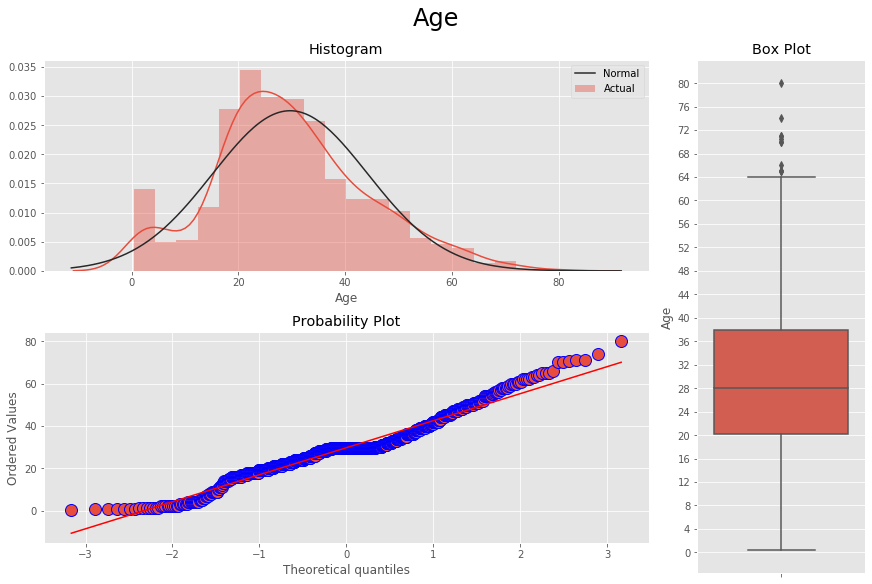

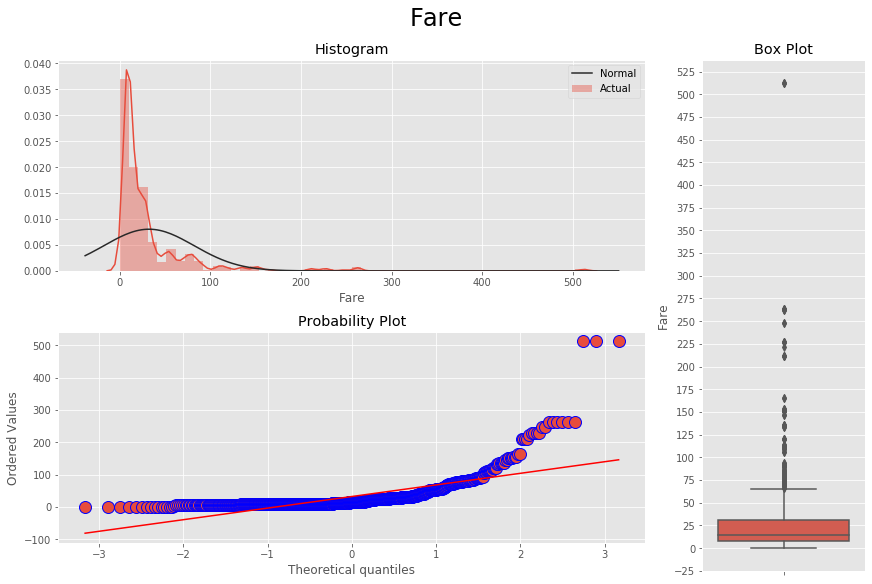

In [12]:
plot_3chart(v_train, 'Age')
plot_3chart(v_train, 'Fare')

In [13]:
# Listing most related continious values to target.
train_corr = v_train[['Survived', 'Age', 'Fare'
                      ]].corr(method='spearman').abs().unstack().sort_values(
                          kind='quicksort', ascending=False).reset_index()
train_corr.rename(columns={
    'level_0': 'Feature A',
    'level_1': 'Feature B',
    0: 'Correlation Coefficient'
},
                  inplace=True)
train_corr[(train_corr['Feature A'] == 'Survived')].style.background_gradient(
    cmap='summer_r')

,Feature A,Feature B,Correlation Coefficient
2,Survived,Survived,1
4,Survived,Fare,0.323736
8,Survived,Age,0.0525653


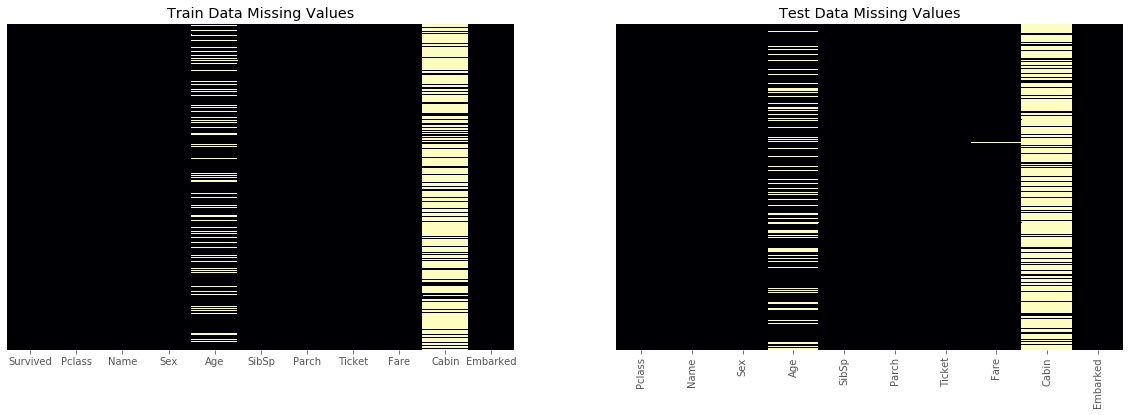

In [14]:
# Detecting missing data

fig, ax = plt.subplots(ncols=2, figsize=(20, 6))
sns.heatmap(v_train.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='magma',
            ax=ax[0])
sns.heatmap(v_test.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='magma',
            ax=ax[1])

ax[0].set_title('Train Data Missing Values')
ax[1].set_title('Test Data Missing Values')

plt.xticks(rotation=90)
plt.show()

In [15]:
v_train['Age'].isnull().sum()

177

### Feature Processing

In [16]:
def status(feature):
    print('Processing', feature, ': DONE')
    print(f'Shape after processing {combined.shape}')
    print('*' * 40)

In [17]:
# Data Merge

def get_combined_data():
    train = pd.read_csv('train.csv')
    test = pd.read_csv('test.csv')
    
    targets = train.Survived
    
    combined = train.append(test)
    combined.reset_index(inplace=True, drop=True)
    
    return combined

In [18]:
# process family related data

def process_family():
    
    global combined
    
    combined['FamilySize'] = combined['Parch'] + combined['SibSp'] + 1
    
    combined['Alone'] = combined['FamilySize'].map(lambda s: 1 if s == 1 else 0)
    
    status('Family')
    
    return combined

In [19]:
def family_survival():
    
    global combined
    
    # Extract last name to help identify families
    combined['LastName'] = combined['Name'].map(lambda x: str.split(x, ',')[0])
    
    # Initialize family survival rate
    initial_survival_rate = 0.5
    combined['FamilySurvival'] = initial_survival_rate
    
    for _, grp_df in combined.groupby(['LastName', 'Fare']):
        
        if (len(grp_df) != 1):
            for ind, row in grp_df.iterrows():
                smax = grp_df.drop(ind)['Survived'].max()
                smin = grp_df.drop(ind)['Survived'].min()
                passID = row['PassengerId']
                
                if (smax == 1.0):
                    combined.loc[combined['PassengerId'] == passID,
                                'FamilySurvival'] = 1.0
                elif (smin == 0.0):
                    combined.loc[combined['PassengerId'] == passID,
                                'FamilySurvival'] = 0.0
    
    for _, grp_df in combined.groupby(['Ticket']):

        if (len(grp_df) != 1):
            for ind, row in grp_df.iterrows():
                
                if (row['FamilySurvival'] == 0) | (
                    row['FamilySurvival'] == initial_survival_rate):
                    
                    smax = grp_df.drop(ind)['Survived'].max()
                    smin = grp_df.drop(ind)['Survived'].min()
                    passID = row['PassengerId']

                    if (smax == 1.0):
                        combined.loc[combined['PassengerId'] == passID,
                                    'FamilySurvival'] = 1.0
                    elif (smin == 0.0):
                        combined.loc[combined['PassengerId'] == passID,
                                    'FamilySurvival'] = 0.0
                        
    status('FamilySurvival')
    
    return combined

In [20]:
def get_titles():
    
    global combined
    
    title_dictionary = {
        'Capt': 'Dr/Clergy/Mil',
        'Col': 'Dr/Clergy/Mil',
        'Major': 'Dr/Clergy/Mil',
        'Jonkheer': 'Honorific',
        'Don': 'Honorific',
        'Dona': 'Honorific',
        'Sir': 'Honorific',
        'Dr': 'Dr/Clergy/Mil',
        'Rev': 'Dr/Clergy/Mil',
        'the Countess': 'Honorific',
        'Mme': 'Mrs',
        'Mlle': 'Miss',
        'Ms': 'Mrs',
        'Mr': 'Mr',
        'Mrs': 'Mrs',
        'Miss': 'Miss',
        'Master': 'Master',
        'Lady': 'Honorific'
    }
    
    combined['Title'] = combined['Name'].map(
        lambda x: x.split(',')[1].split('.')[0].strip())
    
    combined['Title'] = combined['Title'].map(title_dictionary)
    
    status('Title')
    
    return combined

In [21]:
def process_names():
    
    global combined
    
    # drop name
    combined.drop('Name', axis=1, inplace=True)

    # encode titles
    title_dummies = pd.get_dummies(combined['Title'], prefix='Title')
    combined = pd.concat([combined, title_dummies], axis=1)
    
    # drop title
    combined.drop('Title', axis=1, inplace=True)
    
    status('names')
    
    return combined

In [22]:
def process_age():
    
    global combined
    
    combined['Age'] = combined.groupby(['Pclass', 'Sex'])['Age'].apply(lambda x: x.fillna(x.median()))
    
    status('Age')
    
    return combined

In [23]:
def age_binder():
    
    global combined
    
    names = ['less21', '21-15', '25-29.5', '29.5-40', '40plus']
    
    combined['AgeBin'] = pd.qcut(combined['Age'], q=5, labels=names)
    age_dummies = pd.get_dummies(combined['AgeBin'], prefix = 'AgeBin')
    combined = pd.concat([combined, age_dummies], axis=1)
    combined.drop('AgeBin', axis=1, inplace=True)
    combined.drop('Age', axis=1, inplace=True)
    
    status('Age Bins')
    
    return combined

In [24]:
def process_fares():
    
    global combined
    
    combined['Fare'] = combined.groupby(['Pclass', 'Sex'])['Fare'].apply(lambda x: x.fillna(x.median()))
    
    status('Fare')
    
    return combined

In [25]:
# Fare Encoder
def process_fare_bin(onehot='None', is_q_cut=True):
    
    global combined
    
    bins = [-1, 7.91, 14.454, 31, 99, 250, np.inf]
    names = [0, 1, 2, 3, 4, 5]
    
    combined['FareBin'] = pd.qcut(combined['Fare'], 
                                  q=6, labels=names).astype('int') if is_q_cut == False else pd.cut(
                                  combined['Fare'], bins, labels=names).astype('int')
    
    if onehot == 'yes':
        farebin_dummies = pd.get_dummies(combined['FareBin'], prefix='FareBin')
        combined = pd.concat([combined, farebin_dummies], axis=1)
        combined.drop('FareBin', inplace=True, axis=1)
        combined.drop('Fare', inplace=True, axis=1)
    elif onehot == 'both':
        farebin_dummies = pd.get_dummies(combined['FareBin'], prefix='FareBin')
        combined = pd.concat([combined, farebin_dummies], axis=1)
        combined.drop('FareBin', axis=1, inplace=True)
    else:
        combined.drop('Fare', axis=1, inplace=True)
        
    return combined

In [26]:
# Process Embarked
def process_embarked():
    
    global combined
    
    # Filling missing value with the most frequent one
    combined.Embarked.fillna(combined.Embarked.mode()[0], inplace=True)
    
    embarked_dummies = pd.get_dummies(combined['Embarked'], prefix='Embarked')
    combined = pd.concat([combined, embarked_dummies], axis=1)
    combined.drop('Embarked', axis=1, inplace=True)
    status('Embarked')
    
    return combined

In [27]:
def process_cabin():
    
    global combined
    
    # create a binary feature CabinInformed
    combined['CabinInformed'] = [
        1 if pd.notnull(cab) else 0 for cab in combined['Cabin']]
    
    combined['Cabin'].fillna('M', inplace=True)
    
    # Extract Deck information
    combined['Deck'] = combined['Cabin'].map(lambda c: c[0])
    combined['Deck'].replace('T', 'A', inplace=True)
    
    # One Hot Deck
    deck_dummies = pd.get_dummies(combined['Deck'], prefix='Deck')
    combined = pd.concat([combined, deck_dummies], axis=1)
    
    # Drop
    combined.drop('Cabin', axis=1, inplace=True)
    combined.drop('Deck', axis=1, inplace=True)
    
    status('Cabin')
    
    return combined

In [28]:
def process_sex():
    
    global combined
    
    combined['Sex'] = combined['Sex'].map({'male': 1, 'female': 0})
    
    status('Sex')
    
    return combined

In [29]:
def process_pclass():
    
    global combined
    
    pclass_dummies = pd.get_dummies(combined['Pclass'], prefix='Pclass')
    combined = pd.concat([combined, pclass_dummies], axis=1)
    
    combined.drop('Pclass', axis=1, inplace=True)
    
    status('Pclass')
    
    return combined

In [30]:
def dropper():
    
    global combined
    
    drop_cols = ['PassengerId', 'Survived', 'Ticket', 'LastName']
    
    combined.drop(drop_cols, axis=1, inplace=True)
    
    status('Drop')
    
    return combined

In [31]:
combined = get_combined_data()
combined = process_family()
combined = family_survival()
combined = get_titles()
combined = process_names()
combined = process_age()
combined = age_binder()
combined = process_fares()

combined = process_fare_bin(onehot = 'both')
combined = process_embarked()
combined = process_cabin()
combined = process_sex()
combined = process_pclass()
combined = dropper()

print(
    f'Data processed. Missing values left: {combined.isna().sum().sum()}'
)

Processing Family : DONE
Shape after processing (1309, 14)
****************************************
Processing FamilySurvival : DONE
Shape after processing (1309, 16)
****************************************
Processing Title : DONE
Shape after processing (1309, 17)
****************************************
Processing names : DONE
Shape after processing (1309, 21)
****************************************
Processing Age : DONE
Shape after processing (1309, 21)
****************************************
Processing Age Bins : DONE
Shape after processing (1309, 25)
****************************************
Processing Fare : DONE
Shape after processing (1309, 25)
****************************************
Processing Embarked : DONE
Shape after processing (1309, 33)
****************************************
Processing Cabin : DONE
Shape after processing (1309, 41)
****************************************
Processing Sex : DONE
Shape after processing (1309, 41)
****************************************

In [32]:
v_merged = combined.copy()
v_merged['Survived'] = v_train['Survived']
v_merged.head()

,Fare,Parch,Sex,SibSp,FamilySize,Alone,FamilySurvival,Title_Dr/Clergy/Mil,Title_Honorific,Title_Master,Title_Miss,Title_Mr,Title_Mrs,AgeBin_less21,AgeBin_21-15,AgeBin_25-29.5,AgeBin_29.5-40,AgeBin_40plus,FareBin_0,FareBin_1,FareBin_2,FareBin_3,FareBin_4,FareBin_5,Embarked_C,Embarked_Q,Embarked_S,CabinInformed,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_M,Pclass_1,Pclass_2,Pclass_3,Survived
0,7.2500,0,1,1,2,0,0.5,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0.0
1,71.2833,0,0,1,2,0,0.5,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1.0
2,7.9250,0,0,0,1,1,0.5,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1.0
3,53.1000,0,0,1,2,0,0.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1.0
4,8.0500,0,1,0,1,1,0.5,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0.0


In [33]:
v_merged.describe()

,Fare,Parch,Sex,SibSp,FamilySize,Alone,FamilySurvival,Title_Dr/Clergy/Mil,Title_Honorific,Title_Master,Title_Miss,Title_Mr,Title_Mrs,AgeBin_less21,AgeBin_21-15,AgeBin_25-29.5,AgeBin_29.5-40,AgeBin_40plus,FareBin_0,FareBin_1,FareBin_2,FareBin_3,FareBin_4,FareBin_5,Embarked_C,Embarked_Q,Embarked_S,CabinInformed,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_M,Pclass_1,Pclass_2,Pclass_3,Survived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,33.276075,0.385027,0.644003,0.498854,1.883881,0.603514,0.522918,0.017571,0.004584,0.046600,0.200153,0.578304,0.152788,0.221543,0.275783,0.108480,0.199389,0.194805,0.258212,0.236822,0.252865,0.187930,0.051184,0.012987,0.206264,0.093965,0.699771,0.225363,0.017571,0.049656,0.071811,0.035141,0.031322,0.016043,0.003820,0.774637,0.246753,0.211612,0.541635,0.383838
std,51.743642,0.865560,0.478997,1.041658,1.583639,0.489354,0.322230,0.131435,0.067573,0.210862,0.400267,0.494019,0.359921,0.415444,0.447079,0.311104,0.399694,0.396202,0.437819,0.425295,0.434820,0.390805,0.220457,0.113261,0.404777,0.291891,0.458533,0.417981,0.131435,0.217317,0.258273,0.184207,0.174252,0.125688,0.061709,0.417981,0.431287,0.408607,0.498454,0.486592
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.895800,0.000000,0.000000,0.000000,1.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,14.454200,0.000000,1.000000,0.000000,1.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,31.275000,0.000000,1.000000,1.000000,2.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,512.329200,9.000000,1.000000,8.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Correlation Matrix

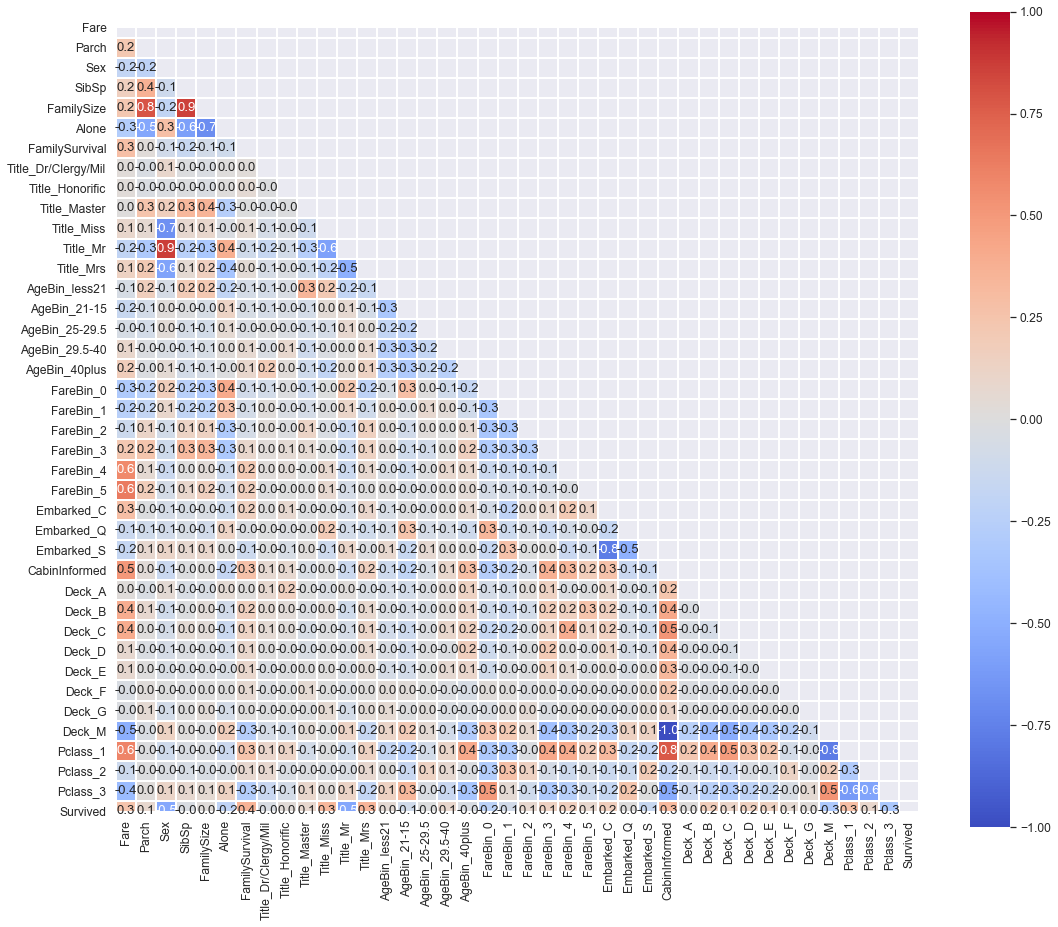

In [34]:
sns.set(font_scale = 1.1)
correlation_train = v_merged.corr()
mask = np.triu(correlation_train.corr())
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_train,
            annot = True,
            fmt = '.1f',
            cmap='coolwarm',
            square = True,
            mask = mask,
            linewidths = 1)

plt.show()

### Modelling

In [35]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, learning_curve, cross_validate, train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, plot_roc_curve, auc
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

import xgboost as xgb
import lightgbm as lgb
from tpot import TPOTClassifier
from mlxtend.plotting import plot_decision_regions

In [36]:
def recover_train_test_target():
    
    global combined
    
    y = pd.read_csv('train.csv', usecols=['Survived'])['Survived']
    
    X = combined.iloc[:train_len]
    
    X_test = combined.iloc[train_len:]
    
    return X, y, X_test

X, y, X_test = recover_train_test_target()

In [37]:
print(f'X shape {X.shape}')
print(f'Y shape {y.shape}')
print(f'X_test shape {X_test.shape}')

X shape (891, 39)
Y shape (891,)
X_test shape (418, 39)


### Model Selection

In [38]:
cv = StratifiedKFold(10, shuffle=True, random_state=42)

rf = RandomForestClassifier( criterion='gini',
                            n_estimators=1750,
                            max_depth=7,
                            min_samples_split=6,
                            min_samples_leaf=6,
                            max_features='auto',
                            oob_score=True,
                            random_state=42,
                            n_jobs=-1,
                            verbose=0)

lg = lgb.LGBMClassifier( max_bin=4,
                        num_iterations=550,
                        learning_rate=0.0114,
                        max_depth=3,
                        num_leaves=7,
                        colsample_bytree=0.35,
                        random_state=42,
                        n_jobs=-1)

tp = TPOTClassifier(generations=5, population_size=20, verbosity=2)

xg = xgb.XGBClassifier(
    n_estimators=2800,
    min_child_weight=0.1,
    learning_rate=0.002,
    max_depth=2,
    subsample=0.47,
    colsample_bytree=0.35,
    gamma=0.4,
    reg_lambda=0.4,
    random_state=42,
    n_jobs=-1,
)

sv = SVC(probability = True)

logreg = LogisticRegression(n_jobs=-1, solver='newton-cg')

gb = GradientBoostingClassifier(random_state=42)

gnb = GaussianNB()

mlp = MLPClassifier(random_state=42)

In [39]:
models = [rf, lg, xg, tp, sv, logreg, gb, gnb, mlp]

In [40]:
def model_check(X, y, models, cv):
    model_table = pd.DataFrame()
    
    row_index = 0
    
    for model in models:
        
        MODEL_name = model.__class__.__name__
        model_table.loc[row_index, 'Model Name'] = MODEL_name
        
        cv_results = cross_validate(
            model,
            X,
            y,
            cv = cv,
            scoring = 'accuracy',
            return_train_score = True,
            n_jobs = -1
        )
        
        model_table.loc[row_index, 'Train Accuracy Mean'] = cv_results['train_score'].mean()
        model_table.loc[row_index, 'Test Accuracy Mean'] = cv_results['test_score'].mean()
        model_table.loc[row_index, 'Test Std'] = cv_results['test_score'].std()
        model_table.loc[row_index, 'Time'] = cv_results['fit_time'].mean()
        
        row_index += 1
        
    model_table.sort_values(by=['Test Accuracy Mean'],
                           ascending = False,
                           inplace = True)
    
    return model_table

In [41]:
model_validation = model_check(X, y, models, cv)
display(model_validation.style.background_gradient(cmap='summer_r'))

,Model Name,Train Accuracy Mean,Test Accuracy Mean,Test Std,Time
1,LGBMClassifier,0.872303,0.852934,0.0250237,0.0961415
2,XGBClassifier,0.864322,0.848452,0.0227856,5.75478
6,GradientBoostingClassifier,0.908716,0.847316,0.0198502,0.145411
5,LogisticRegression,0.858336,0.845094,0.0309949,0.109519
0,RandomForestClassifier,0.875421,0.842859,0.0114075,3.98057
3,TPOTClassifier,0.888139,0.842846,0.0214808,118.491
8,MLPClassifier,0.845611,0.81824,0.0410395,0.565119
7,GaussianNB,0.771667,0.756367,0.0477175,0.00219479
4,SVC,0.689986,0.687953,0.0268784,0.141328


In [42]:
# Plotting model performances
def model_barplot(models, bins):
    fig, ax = plt.subplots(figsize=(16, 8))
    g = sns.barplot('Test Accuracy Mean',
                    'Model Name',
                    data=models,
                    palette='plasma',
                    orient='h',
                    **{'xerr': models['Test Std']})
    g.set_xlabel('Test Mean Accuracy')
    g = g.set_title('Cross validation scores')
    ax.xaxis.set_major_locator(MaxNLocator(nbins=bins))

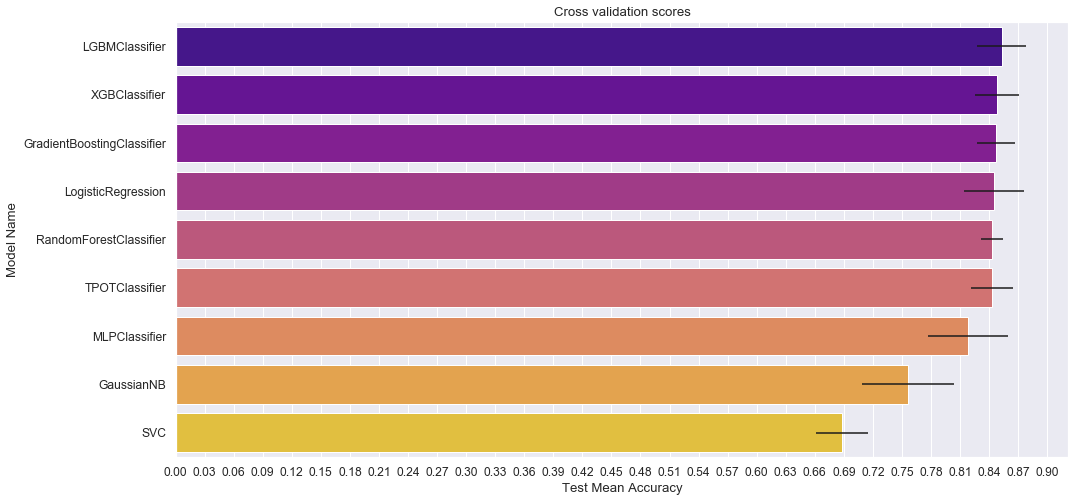

In [43]:
# Plotting model performances
model_barplot(model_validation, 32)

In [44]:
def f_imp(estimators, X, y, bins):
    
    fig, axes = plt.subplots(2, 2, figsize=(20, 14))
    axes = axes.flatten()

    for ax, estimator in zip(axes, estimators):

        try:
            estimator.fit(X, y)
            feature_imp = pd.DataFrame(sorted(
                zip(estimator.feature_importances_, X.columns)),
                                       columns=['Value', 'Feature'])

            sns.barplot(x="Value",
                        y="Feature",
                        data=feature_imp.sort_values(by="Value",
                                                     ascending=False),
                        ax=ax,
                        palette='plasma')
            plt.title('Features')
            plt.tight_layout()
            ax.set(title=f'{estimator.__class__.__name__} Feature Impotances')
            ax.xaxis.set_major_locator(MaxNLocator(nbins=bins))
        except:
            continue
    plt.show()

Optimization Progress: 100%|███████████████████████████████████████████████████| 120/120 [01:37<00:00,  1.24pipeline/s]
                                                                                                                       
Best pipeline: GradientBoostingClassifier(MaxAbsScaler(input_matrix), learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=19, min_samples_split=7, n_estimators=100, subsample=0.6500000000000001)


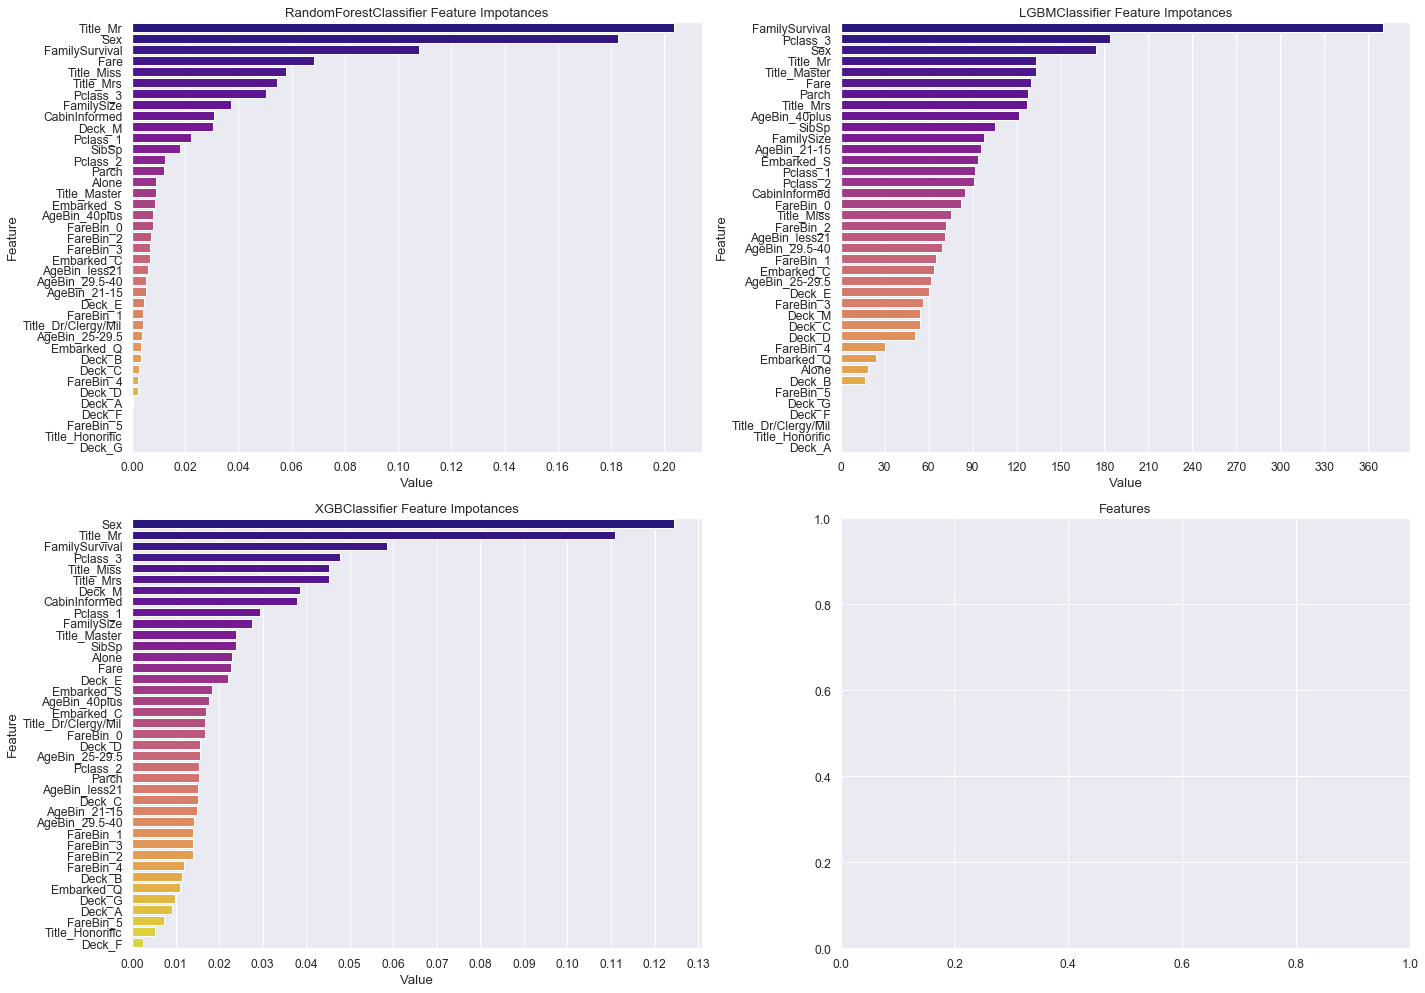

In [45]:
f_imp(models, X, y, 14)

In [46]:
def f_selector(X, y, estimator, features):
    X_train, X_valid, y_train, y_valid = train_test_split(X,
                                                         y,
                                                         test_size=0.3,
                                                         random_state=42)
    
    # Create the Recursive Feature Selector
    rfe = RFE(estimator=estimator, n_features_to_select = features, verbose=1)
    
    # Fit the selector
    rfe.fit(X_train, y_train)
    
    # Print the features and their ranking (the higher the less useful)
    print(dict(zip(X.columns, rfe.ranking_)))
    
    # Print the features that are not eliminated
    print(X.columns[rfe.support_])
    
    acc = accuracy_score(y_valid, rfe.predict(X_valid))
    print("{0: .1%} accuracy on test set. ".format(acc))
    
    X_red = X[X_train.columns[rfe.support_].to_list()]
    X_te_red = X_test[X_train.columns[rfe.support_].to_list()]
    
    return X_red, X_te_red

In [48]:
X_sel, X_test_sel = f_selector(X, y, lg, 30)
display(X_sel)
display(X_test_sel)

Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
{'Fare': 1, 'Parch': 1, 'Sex': 1, 'SibSp': 1, 'FamilySize': 1, 'Alone': 1, 'FamilySurvival': 1, 'Title_Dr/Clergy/Mil': 4, 'Title_Honorific': 10, 'Title_Master': 1, 'Title_Miss': 1, 'Title_Mr': 1, 'Title_Mrs': 1, 'AgeBin_less21': 1, 'AgeBin_21-15': 1, 'AgeBin_25-29.5': 1, 'AgeBin_29.5-40': 1, 'AgeBin_40plus': 1, 'FareBin_0': 1, 'FareBin_1': 1, 'FareBin_2': 1, 'FareBin_3': 1, 'FareBin_4': 1, 'FareBin_5': 5, 'Embarked_C': 1, 'Embarked_Q': 3, 'Embarked_S': 1, 'CabinInformed': 1, 'Deck_A': 9, 'Deck_B': 2, 'Deck_C': 1, 'Deck_D': 6, 'Deck_E': 1, 'Deck_F': 7, 'Deck_G': 8, 'Deck_M': 1, 'Pclass_1': 1, 'Pclass_2': 1, 'Pclass_3': 1}
Index(['Fare', 'Parch', 'Sex', 'SibSp', 'Family

,Fare,Parch,Sex,SibSp,FamilySize,Alone,FamilySurvival,Title_Master,Title_Miss,Title_Mr,Title_Mrs,AgeBin_less21,AgeBin_21-15,AgeBin_25-29.5,AgeBin_29.5-40,AgeBin_40plus,FareBin_0,FareBin_1,FareBin_2,FareBin_3,FareBin_4,Embarked_C,Embarked_S,CabinInformed,Deck_C,Deck_E,Deck_M,Pclass_1,Pclass_2,Pclass_3
0,7.2500,0,1,1,2,0,0.5,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1
1,71.2833,0,0,1,2,0,0.5,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0
2,7.9250,0,0,0,1,1,0.5,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
3,53.1000,0,0,1,2,0,0.0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,1,0,0,1,0,0
4,8.0500,0,1,0,1,1,0.5,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,13.0000,0,1,0,1,1,0.5,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
887,30.0000,0,0,0,1,1,0.5,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0
888,23.4500,2,0,1,4,0,0.0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1
889,30.0000,0,1,0,1,1,0.5,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,1,0,0


,Fare,Parch,Sex,SibSp,FamilySize,Alone,FamilySurvival,Title_Master,Title_Miss,Title_Mr,Title_Mrs,AgeBin_less21,AgeBin_21-15,AgeBin_25-29.5,AgeBin_29.5-40,AgeBin_40plus,FareBin_0,FareBin_1,FareBin_2,FareBin_3,FareBin_4,Embarked_C,Embarked_S,CabinInformed,Deck_C,Deck_E,Deck_M,Pclass_1,Pclass_2,Pclass_3
891,7.8292,0,1,0,1,1,0.5,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
892,7.0000,0,0,1,2,0,0.5,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1
893,9.6875,0,1,0,1,1,0.5,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0
894,8.6625,0,1,0,1,1,0.5,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
895,12.2875,1,0,1,3,0,1.0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,8.0500,0,1,0,1,1,0.5,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
1305,108.9000,0,0,0,1,1,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,0,0
1306,7.2500,0,1,0,1,1,0.5,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1
1307,8.0500,0,1,0,1,1,0.5,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1


### Submission

In [49]:
lg_model_full_data = rf.fit(X_sel, y)
print(accuracy_score(y, lg_model_full_data.predict(X_sel)))
y_pred = lg_model_full_data.predict(X_test_sel)

0.8720538720538721


In [50]:
test_df = pd.read_csv('test.csv')
submission_df = pd.DataFrame(columns=['PassengerId', 'Survived'])
submission_df['PassengerId'] = test_df['PassengerId']
submission_df['Survived'] = y_pred
submission_df.to_csv('submission.csv', header=True, index=False)
submission_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
